<a href="https://colab.research.google.com/github/RizqullahRamadhan27/Project-Portofolio-Data/blob/main/DepartmentProduct_Rizqullah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, \
                            classification_report, accuracy_score, \
                            recall_score, precision_score, f1_score
# Import neccesaries packages & modules

import math
from collections import Counter, defaultdict
from functools import partial
from pprint import pprint

import graphviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, \
                            classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

plt.style.use("fivethirtyeight")

### Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/data_product.csv")
df_product=df[:3000]
df_product

,id,cost,order_id,product_id,sale_price,product_retail_price,product_distribution_center_id,status,product_category,product_name,product_brand,product_department,city,state,browser,traffic_source,event_type
0,97,14.337400,73,9533,88.500000,26.600000,3,Shipped,Intimates,Heavenly Shapewear Women's Seamless Molded Cup...,Heavenly Shapewear,Women,Shenzhen,Jilin,Firefox,Adwords,department
1,98,14.337400,73,15497,26.950001,26.600000,3,Shipped,Intimates,Heavenly Shapewear Women's Seamless Molded Cup...,Heavenly Shapewear,Women,Shenzhen,Jilin,Firefox,Adwords,product
2,99,6.685150,73,15029,84.000000,11.350000,9,Shipped,Leggings,Allegra K Ladies Drawstring Waist Faux Leather...,Allegra K,Women,Shenzhen,Jilin,Firefox,Adwords,cart
3,100,6.685150,74,11195,28.000000,11.350000,9,Complete,Leggings,Allegra K Ladies Drawstring Waist Faux Leather...,Allegra K,Women,Shenzhen,Jilin,Firefox,Adwords,purchase
4,101,6.685150,75,3970,34.900002,11.350000,9,Shipped,Leggings,Allegra K Ladies Drawstring Waist Faux Leather...,Allegra K,Women,Harbin,Jiangsu,IE,Adwords,department
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,3092,11.014490,2138,25387,36.500000,19.990000,4,Shipped,Tops & Tees,Duck Commander Fear God Short Sleeve T-Shirt,Duck Commander,Men,Lilienthal,Niedersachsen,Chrome,Email,department
2996,3093,81.478892,2139,23008,47.950001,127.510002,3,Processing,Suits,Evan Picone Women's Cranberry Fields Pant Suit,Evan Picone,Women,Lilienthal,Niedersachsen,Chrome,Email,product
2997,3094,81.478892,2139,27509,59.500000,127.510002,3,Processing,Suits,Evan Picone Women's Cranberry Fields Pant Suit,Evan Picone,Women,Lilienthal,Niedersachsen,Chrome,Email,cart
2998,3095,81.478892,2140,21366,39.500000,127.510002,3,Returned,Suits,Evan Picone Women's Cranberry Fields Pant Suit,Evan Picone,Women,Lilienthal,Niedersachsen,Chrome,Email,department


###Pengecekan Data

In [ ]:
df_product.isnull().any()

id                                False
cost                              False
order_id                          False
product_id                        False
sale_price                        False
product_retail_price              False
product_distribution_center_id    False
status                            False
product_category                  False
product_name                      False
product_brand                      True
product_department                False
city                               True
state                             False
browser                           False
traffic_source                    False
event_type                        False
dtype: bool

In [ ]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3000 non-null   int64  
 1   cost                            3000 non-null   float64
 2   order_id                        3000 non-null   int64  
 3   product_id                      3000 non-null   int64  
 4   sale_price                      3000 non-null   float64
 5   product_retail_price            3000 non-null   float64
 6   product_distribution_center_id  3000 non-null   int64  
 7   status                          3000 non-null   object 
 8   product_category                3000 non-null   object 
 9   product_name                    3000 non-null   object 
 10  product_brand                   2992 non-null   object 
 11  product_department              3000 non-null   object 
 12  city                            29

### Missing Value

In [ ]:
df_product[df_product.isna().all(axis=1)]

,id,cost,order_id,product_id,sale_price,product_retail_price,product_distribution_center_id,status,product_category,product_name,product_brand,product_department,city,state,browser,traffic_source,event_type


In [ ]:
df_product.isnull().sum()

id                                 0
cost                               0
order_id                           0
product_id                         0
sale_price                         0
product_retail_price               0
product_distribution_center_id     0
status                             0
product_category                   0
product_name                       0
product_brand                      8
product_department                 0
city                              43
state                              0
browser                            0
traffic_source                     0
event_type                         0
dtype: int64

In [ ]:
df_product = df_product.dropna()

In [ ]:
df_product.isnull().sum()

id                                0
cost                              0
order_id                          0
product_id                        0
sale_price                        0
product_retail_price              0
product_distribution_center_id    0
status                            0
product_category                  0
product_name                      0
product_brand                     0
product_department                0
city                              0
state                             0
browser                           0
traffic_source                    0
event_type                        0
dtype: int64

#### Missing Value Dengan memberikan nilai 0

In [ ]:
#for feature in df_product.columns:
    # hanya pilih fitur yang memiliki missing values dan tampilkan nilai missing values dan hitung jumlahnya dengan unique()
    #if df_product[feature].isna().any():
        #print(f"num of unique values in {feature}: ",
            #df_product[feature].unique())

In [ ]:
#df_product = df_product.fillna(0)

In [ ]:
#df_product.isna().sum()

### Mengubah Type Data dan Drop/Hapus Data

In [ ]:
df_product['cost'] = df_product['cost'].apply(int)
df_product['product_retail_price'] = df_product['product_retail_price'].apply(int)
df_product['sale_price'] = df_product['sale_price'].apply(int)
df_product['product_distribution_center_id'] = df_product['product_distribution_center_id'].apply(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2949 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              2949 non-null   int64 
 1   cost                            2949 non-null   int64 
 2   order_id                        2949 non-null   int64 
 3   product_id                      2949 non-null   int64 
 4   sale_price                      2949 non-null   int64 
 5   product_retail_price            2949 non-null   int64 
 6   product_distribution_center_id  2949 non-null   int64 
 7   status                          2949 non-null   object
 8   product_category                2949 non-null   object
 9   product_name                    2949 non-null   object
 10  product_brand                   2949 non-null   object
 11  product_department              2949 non-null   object
 12  city                            2949 non-null   

In [ ]:
#df_product['sale_price'] = pd.cut(df_product.sale_price,bins=[-1,56,273],labels=["Good","Bad"])

In [ ]:
#df_product.drop("sold_at", axis=1, inplace=True)
#df_product.drop("city", axis=1, inplace=True)
df_product.drop("product_brand", axis=1, inplace=True)
#df_product.drop("product_category", axis=1, inplace=True)
df_product.drop("product_name", axis=1, inplace=True)
#df_product.drop("city", axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
def status(x):
  if x == "Shipped":
    return 'Terjual'
  elif x == "Complete": 
    return 'Terjual'
  elif x == "Processing":
    return 'Terjual'
  elif x == "Cancelled":  
    return 'Tidak Terjual'
  elif x == "Returned":
    return 'Tidak Terjual'

In [ ]:
# Mengubah tipe data dari kategorikal ke object
df_product['status'] = df_product['status'].astype('object')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_product['status'] = df_product['status'].apply(status)
df_product

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,cost,order_id,product_id,sale_price,product_retail_price,product_distribution_center_id,status,product_category,product_department,city,state,browser,traffic_source,event_type
0,97,14,73,9533,88,26,3,Terjual,Intimates,Women,Shenzhen,Jilin,Firefox,Adwords,department
1,98,14,73,15497,26,26,3,Terjual,Intimates,Women,Shenzhen,Jilin,Firefox,Adwords,product
2,99,6,73,15029,84,11,9,Terjual,Leggings,Women,Shenzhen,Jilin,Firefox,Adwords,cart
3,100,6,74,11195,28,11,9,Terjual,Leggings,Women,Shenzhen,Jilin,Firefox,Adwords,purchase
4,101,6,75,3970,34,11,9,Terjual,Leggings,Women,Harbin,Jiangsu,IE,Adwords,department
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,3092,11,2138,25387,36,19,4,Terjual,Tops & Tees,Men,Lilienthal,Niedersachsen,Chrome,Email,department
2996,3093,81,2139,23008,47,127,3,Terjual,Suits,Women,Lilienthal,Niedersachsen,Chrome,Email,product
2997,3094,81,2139,27509,59,127,3,Terjual,Suits,Women,Lilienthal,Niedersachsen,Chrome,Email,cart
2998,3095,81,2140,21366,39,127,3,Tidak Terjual,Suits,Women,Lilienthal,Niedersachsen,Chrome,Email,department


In [ ]:
df_product.info()

In [ ]:
#df_product.drop("sale_price", axis=1, inplace=True)

### Melihat Banyaknya Jumlah Data Category (Terbanyak -> Rendah) 

In [ ]:
df_product.status.value_counts().to_frame() 

,status
Shipped,939
Complete,751
Processing,619
Cancelled,371
Returned,269


In [ ]:
df_product.city.value_counts().to_frame() 

,city
Beijing,116
Victorville,102
Shanghai,97
Hohhot,91
Zhengzhou,82
...,...
Recife,5
Changde,5
Étalle,5
Horn Lake,5


In [ ]:
df_product.state.value_counts().to_frame() 

,state
Guangdong,282
Shanghai,178
Mato Grosso,141
Tianjin,135
Nordrhein-Westfalen,122
...,...
Normandie,5
Hiroshima,5
Anhui,5
Mississippi,5


In [ ]:
df_product.browser.value_counts().to_frame() 

,browser
Chrome,1338
Safari,663
Firefox,589
Other,190
IE,169


In [ ]:
df_product.traffic_source.value_counts().to_frame() 

,traffic_source
Email,1411
Adwords,816
Facebook,296
YouTube,279
Organic,147


In [ ]:
df_product.event_type.value_counts().to_frame() 

,event_type
department,792
product,792
cart,791
purchase,393
home,181


In [ ]:
df_product.product_category.value_counts().to_frame() 

,product_category
Intimates,226
Shorts,200
Jeans,193
Fashion Hoodies & Sweatshirts,192
Sweaters,189
Accessories,179
Outerwear & Coats,177
Sleep & Lounge,166
Swim,153
Tops & Tees,143


In [ ]:
df_product.product_name.value_counts().to_frame() 

,product_name
Capezio Women's Brief,7
Michael Kors Men's Full Zip,7
Upsie Belly - Belly Bandit Pregnancy Support Band and Wrap,6
Arc'teryx Men's Cordin Pullover,6
Oakley Men's Straight Jacket Iridium N Sunglasses,6
...,...
Tommy Hilfiger Men's Plaid Woven Boxer,2
7 For All Mankind Men's Austyn Relaxed Straight Leg Jean,2
N2N Dream Lounge Robe Black,2
Kenneth Cole Men's Pinstripe Flat Front Pant,2


In [ ]:
df_product.product_brand.value_counts().to_frame() 

,product_brand
Allegra K,99
Calvin Klein,52
Hanes,44
Quiksilver,39
Hurley,38
...,...
COCO,2
Levante,2
MyEyeglassCase,2
tasc Performance,2


In [ ]:
df_product.product_department.value_counts().to_frame() 

,product_department
Men,1503
Women,1446


### Data Dictionary

In [ ]:
numerical_features = df_product.select_dtypes(include="number").columns.tolist()
categorical_features = df_product.select_dtypes(include="object").columns.tolist()

print("Numerical features:")
pprint(numerical_features)
pprint("------------------------------------------------------------------------")
print("Categorical features:")
pprint(categorical_features, compact=True)

Numerical features:
['id',
 'cost',
 'order_id',
 'product_id',
 'sale_price',
 'product_retail_price',
 'product_distribution_center_id']
'------------------------------------------------------------------------'
Categorical features:
['status', 'product_category', 'product_department', 'city', 'state', 'browser',
 'traffic_source', 'event_type']


In [ ]:
#df_product['product_category'] = pd.Categorical(df_product['product_category'])

In [ ]:
#df_product['product_category'].dtypes

In [ ]:
#df_product.info()

### Summary Statistic

In [ ]:
df_product[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
id,2949.0,1599.849780,870.125389,97.0,838.0,1615.0,2354.0,3096.0
cost,2949.0,28.839607,28.360116,1.0,11.0,20.0,36.0,287.0
order_id,2949.0,1106.565955,606.827437,73.0,572.0,1125.0,1632.0,2141.0
product_id,2949.0,15658.676501,8414.022194,9.0,8544.0,16679.0,22929.0,29120.0
sale_price,2949.0,59.143438,66.045440,2.0,24.0,40.0,69.0,903.0
product_retail_price,2949.0,61.086470,62.278457,2.0,24.0,43.0,75.0,695.0
product_distribution_center_id,2949.0,4.962021,2.921737,1.0,2.0,4.0,8.0,10.0


In [ ]:
df_product[categorical_features].describe().T

,count,unique,top,freq
status,2949,5,Shipped,939
product_category,2949,25,Intimates,226
product_name,2949,1052,Capezio Women's Brief,7
product_brand,2949,521,Allegra K,99
product_department,2949,2,Men,1503
city,2949,146,Beijing,116
state,2949,80,Guangdong,282
browser,2949,5,Chrome,1338
traffic_source,2949,5,Email,1411
event_type,2949,5,department,792


###Melihat Outlier dan Membersihkannya

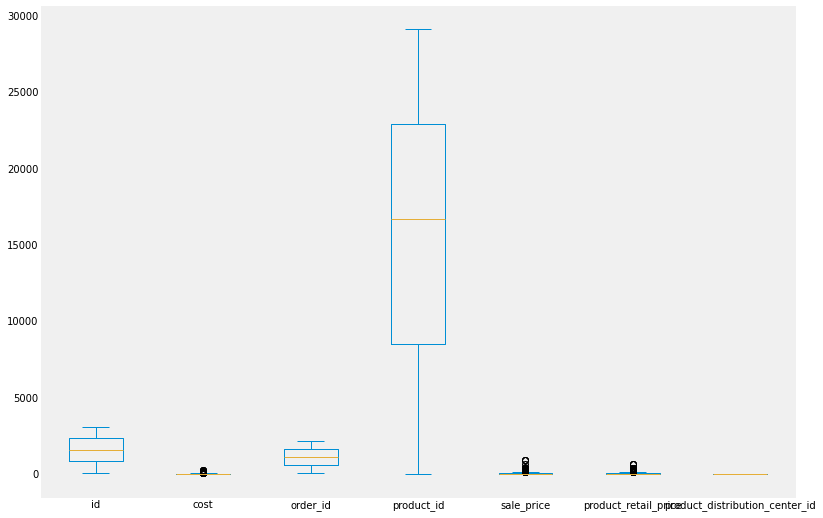

In [ ]:
df_product[numerical_features].plot(kind="box", figsize=(12, 9))
plt.grid(False)
plt.show()

In [ ]:
# Handling outlier with IQR
Q1 = (df_product[['id', 'cost', 'order_id', 'product_id','sale_price','product_retail_price','product_distribution_center_id']]).quantile(0.25)
Q3 = (df_product[['id', 'cost', 'order_id', 'product_id','sale_price','product_retail_price','product_distribution_center_id']]).quantile(0.75)
IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)
more_than = (df_product > maximum)
lower_than = (df_product < minimum)
df_product = df_product.mask(more_than, maximum, axis=1)
df_product = df_product.mask(lower_than, minimum, axis=1)
print('\nPersebaran data setelah ditangani Outlier: ')
print(df_product[['id', 'cost', 'order_id', 'product_id','sale_price','product_retail_price','product_distribution_center_id']].describe())

Nilai Maximum dari masing-masing Variable adalah: 
id                                 4628.0
cost                                 73.5
order_id                           3222.0
product_id                        44506.5
sale_price                          136.5
product_retail_price                151.5
product_distribution_center_id       17.0
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
id                                -1436.0
cost                                -26.5
order_id                          -1018.0
product_id                       -13033.5
sale_price                          -43.5
product_retail_price                -52.5
product_distribution_center_id       -7.0
dtype: float64

Persebaran data setelah ditangani Outlier: 
                id         cost     order_id    product_id   sale_price  \
count  2949.000000  2949.000000  2949.000000   2949.000000  2949.000000   
mean   1599.849780    26.406918  1106.565955  15658.676501    52.020855   
std     8

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  if sys.path[0] == '':


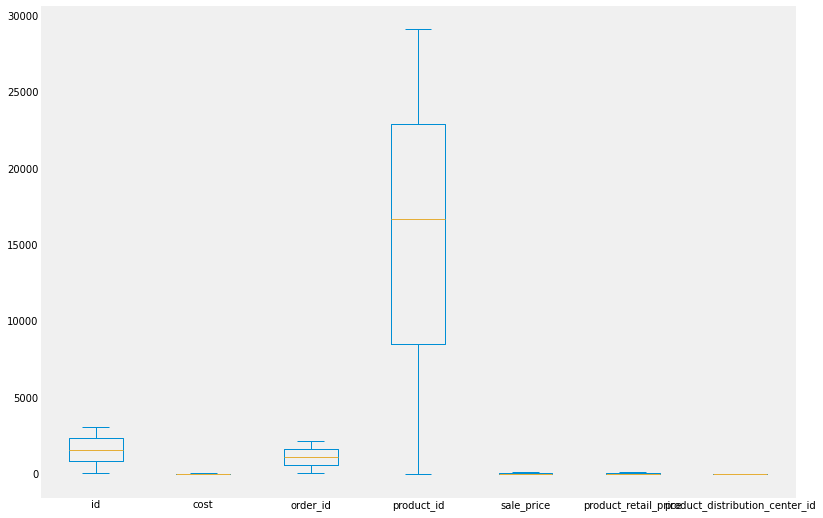

In [ ]:
df_product[numerical_features].plot(kind="box", figsize=(12, 9))
plt.grid(False)
plt.show()

####Visualisasi dengan Violin

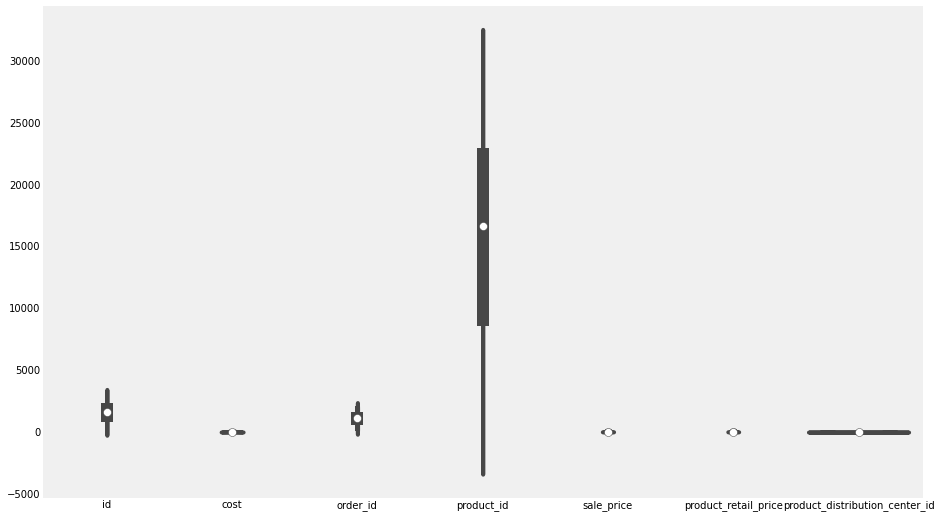

In [ ]:
plt.figure(figsize=(14, 9))
sns.violinplot(data=df_product[numerical_features])
plt.grid(False)
plt.show()

###Visualisasi Numerical

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


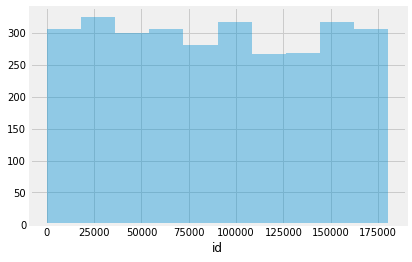

In [ ]:
sns.distplot(df_product['id'], bins=10, kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


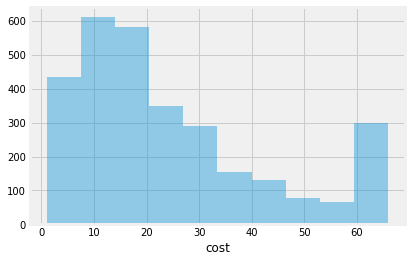

In [ ]:
sns.distplot(df_product['cost'], bins=10, kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


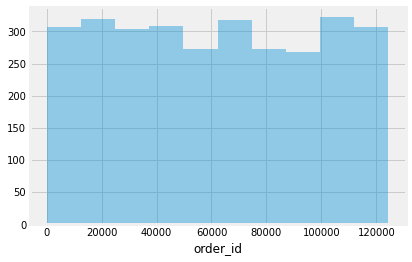

In [ ]:
sns.distplot(df_product['order_id'], bins=10, kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


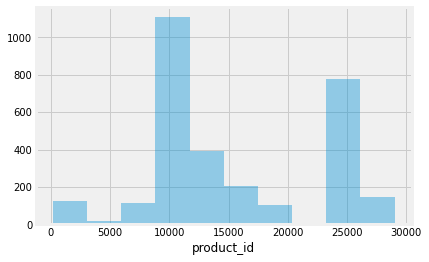

In [ ]:
sns.distplot(df_product['product_id'], bins=10, kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


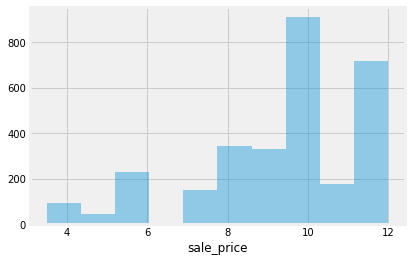

In [ ]:
sns.distplot(df_product['sale_price'], bins=10, kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


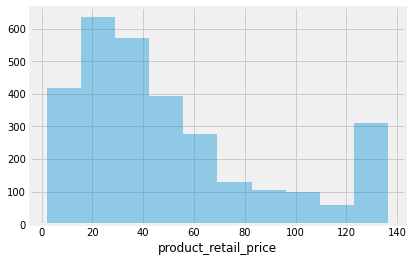

In [ ]:
sns.distplot(df_product['product_retail_price'], bins=10, kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


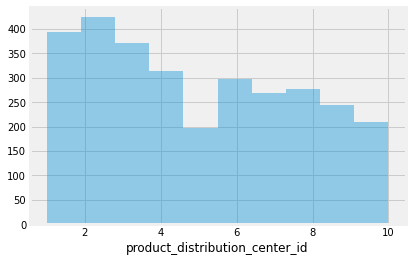

In [ ]:
sns.distplot(df_product['product_distribution_center_id'], bins=10, kde=False)

### Visualisasi Category

####Category

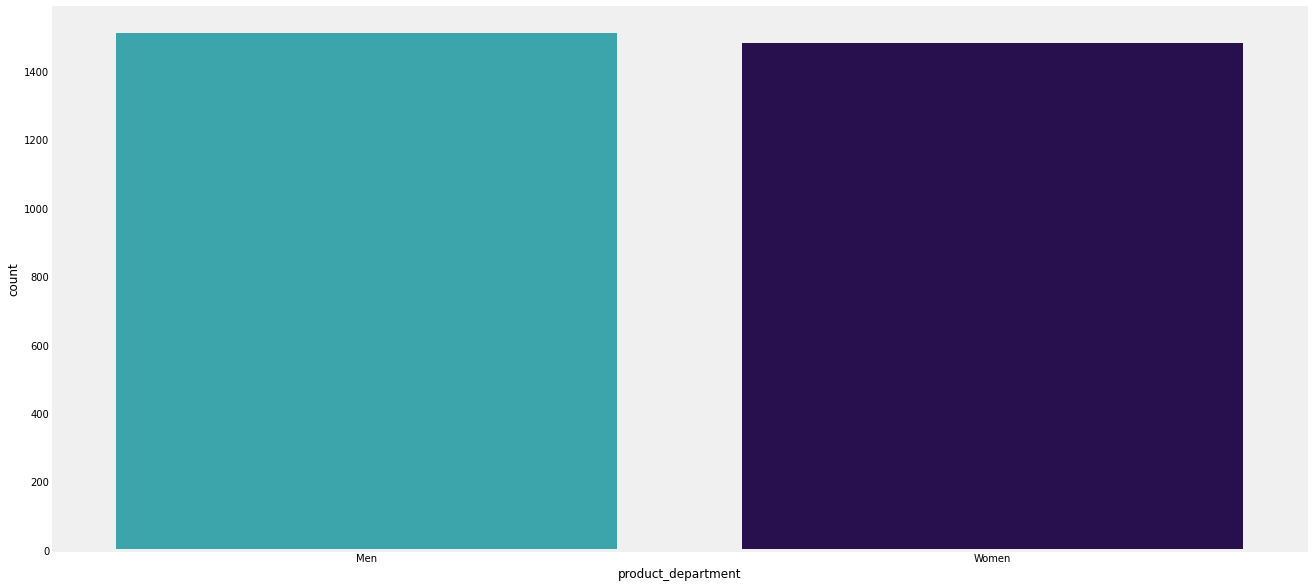

In [ ]:
departemen = df_product.product_department.value_counts().index

plt.figure(figsize=(20, 10))
sns.countplot(
    x="product_department",
    data=df_product,
    order= departemen,
    palette=["#29B5BF"] + (len(departemen)-1)*["#260659", "#16558F", "#F2C85B"]
)
plt.grid(False)
plt.show()

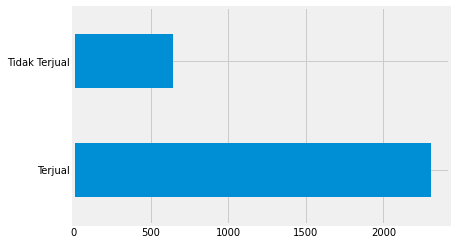

In [ ]:
df_product['status'].value_counts().plot(kind ='barh')

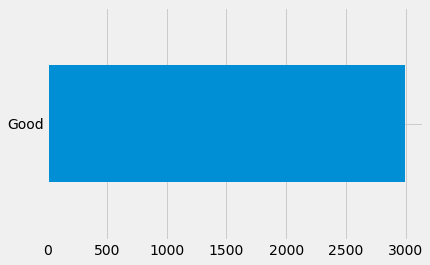

In [ ]:
df_product['sale_price'].value_counts().plot(kind ='barh')

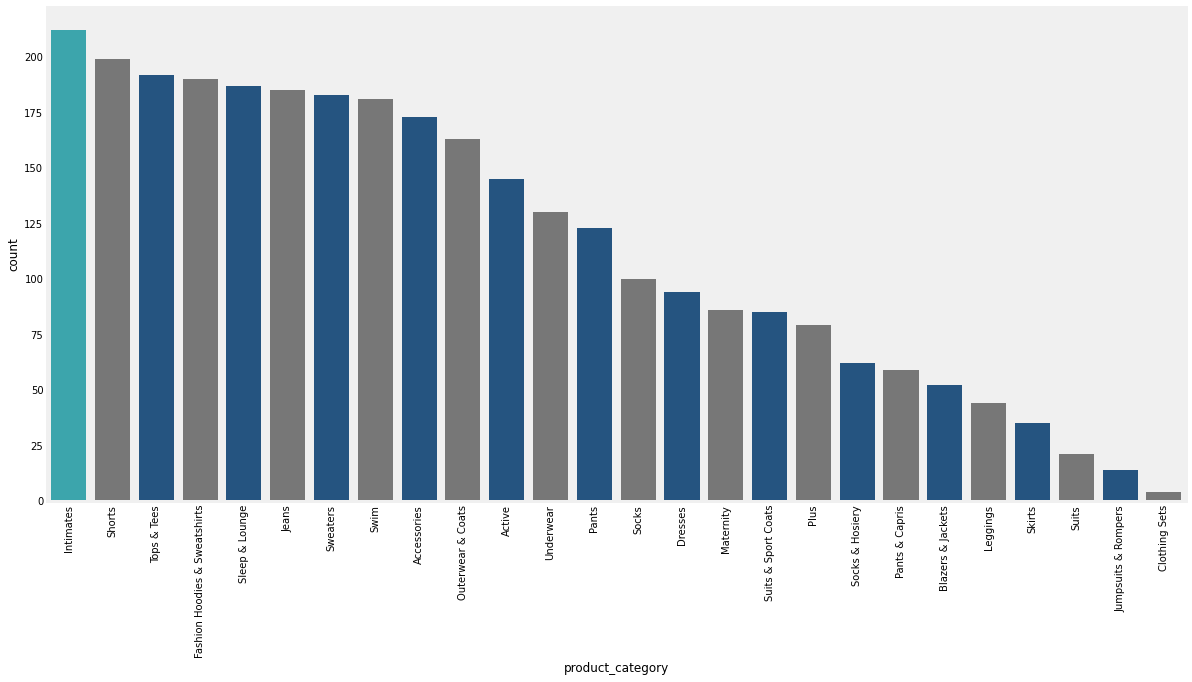

In [ ]:
product_category_category_order = df_product.product_category.value_counts().index

plt.figure(figsize=(40, 20))
plt.subplot(2,2,1)
sns.countplot(
    x="product_category",
    data=df_product,
    order=product_category_category_order,
    palette=["#29B5BF"] + (len(product_category_category_order)-1)*["#777777", "#16558F"] 
)
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

In [ ]:
def plot_count(data, x=None, y=None, palette=None, figsize=(12, 6), **kwargs):
    column_order = data[x or y].value_counts().index

    plt.figure(figsize=figsize)
    sns.countplot(
        x=x, y=y, data=data, order=column_order,
        palette=palette, **kwargs
    )
    plt.grid(False)


MAIN_COLOR = ["#29B5BF"]    # warna utama untuk visualisasi
OTHER_COLOR = ["#777777"]

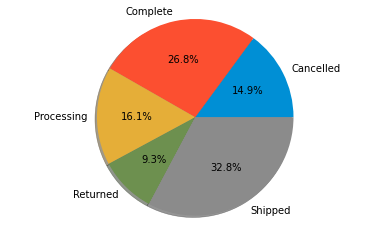

In [ ]:
labels = df_product['status'].astype('category').cat.categories.tolist()
counts = df_product['status'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

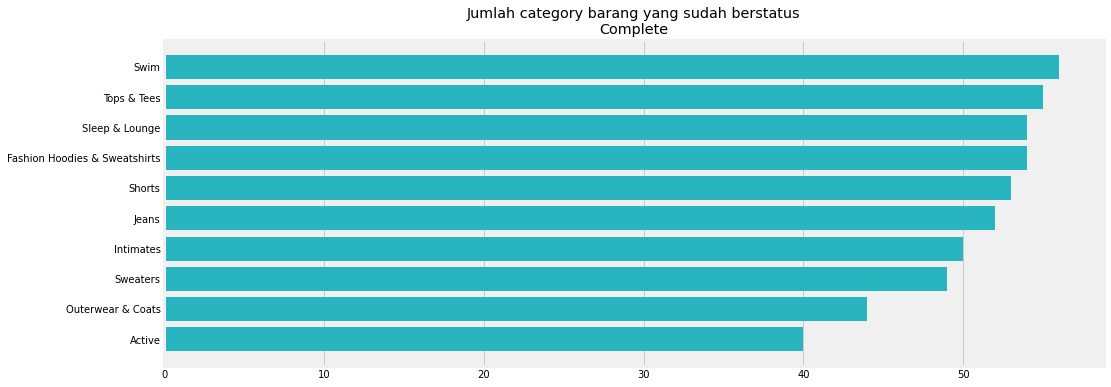

In [ ]:

df_com = df_product[df_product['status'] == 'Complete']

# membuat grafik 10 kategori produk terbanyak
plt.figure(figsize = (15,6))
plt.barh(y = df_com['product_category'].value_counts()[:10].sort_values(ascending = True).index,
        width = df_com['product_category'].value_counts()[:10].sort_values(ascending = True).values,color='#29B5BF')
plt.title('Jumlah category barang yang sudah berstatus\nComplete')
plt.grid(axis = 'y')
plt.show()

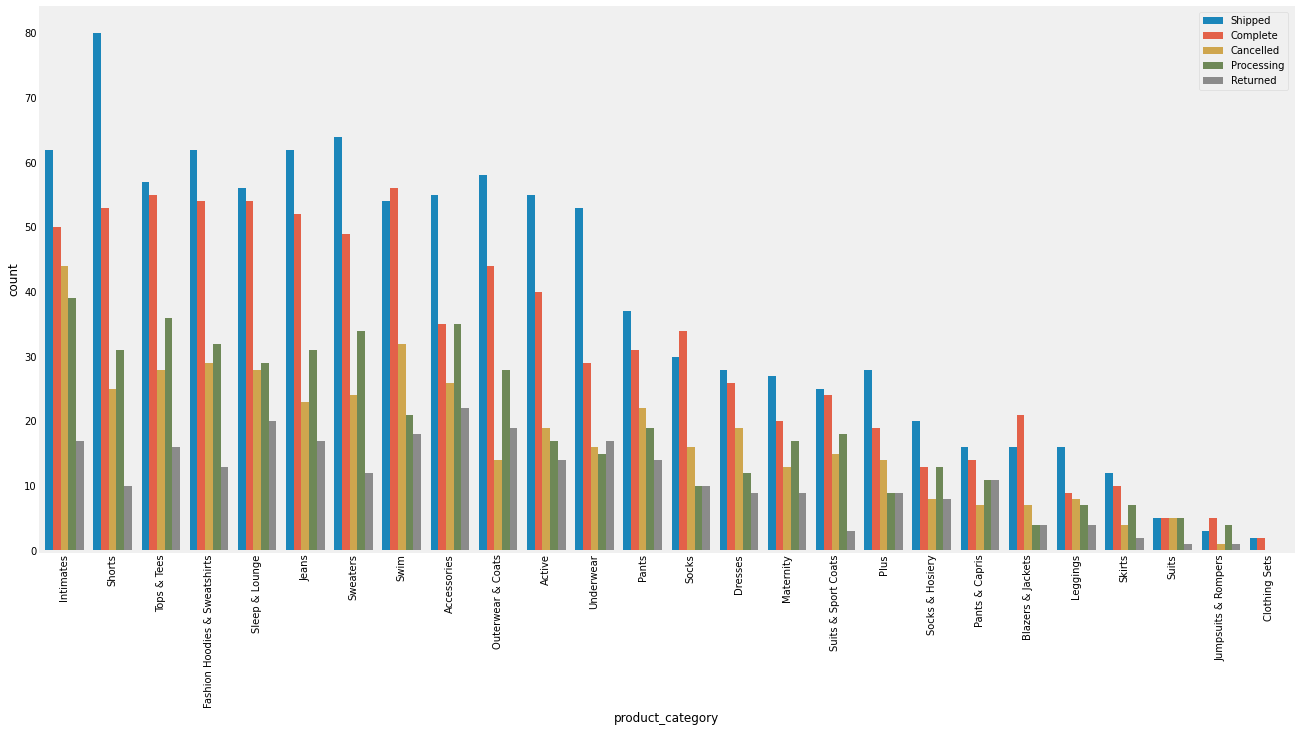

In [ ]:
plot_count(x="product_category", hue="status",data=df_product, figsize=(20, 10))
plt.legend(loc="upper right")
plt.xticks(rotation=90)
plt.show()

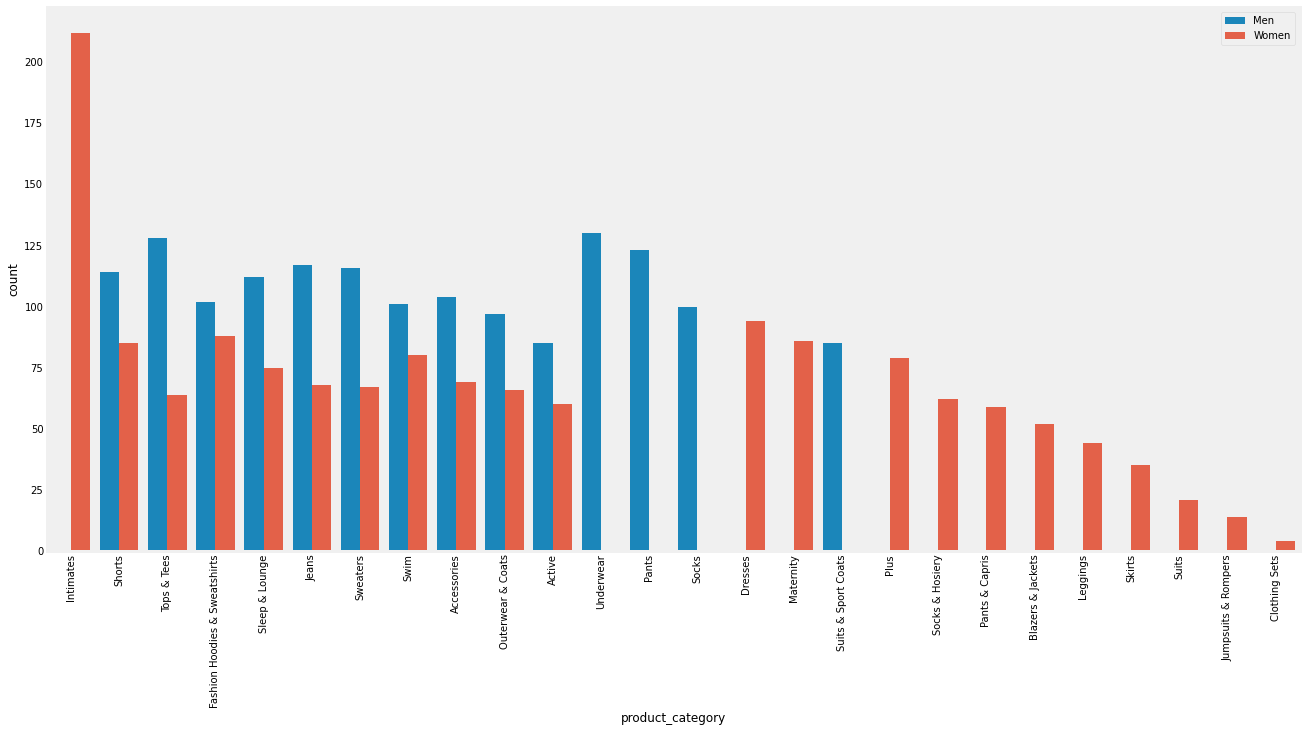

In [ ]:
plot_count(x="product_category", hue="product_department",data=df_product, figsize=(20, 10))
plt.legend(loc="upper right")
plt.xticks(rotation=90)
plt.show()

#### Smooking Status

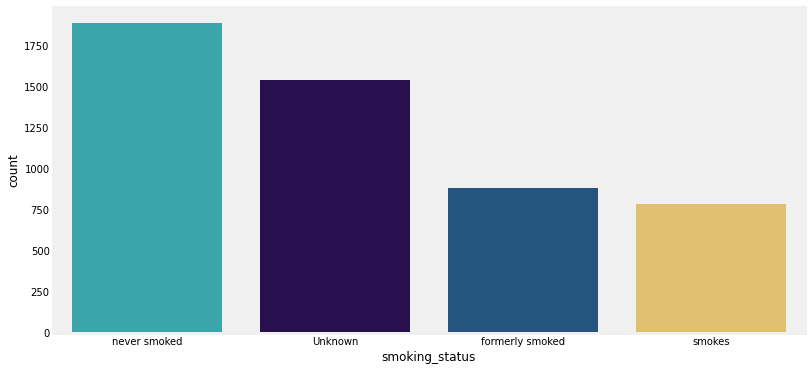

In [ ]:
# Membuat visualisasi berdasarkan Race
# Buat dulu variabel urutan value_count dari yang terbanyak ke yang tersedikit
smook_order = df_product["smoking_status"].value_counts().index

# Memanggil fungsi plot_count dengan kolom Race agar divisualisasikan
plot_count(
   "smoking_status", palette=["#29B5BF"] + (len(smook_order)-1)*["#260659", "#16558F", "#F2C85B"]
)

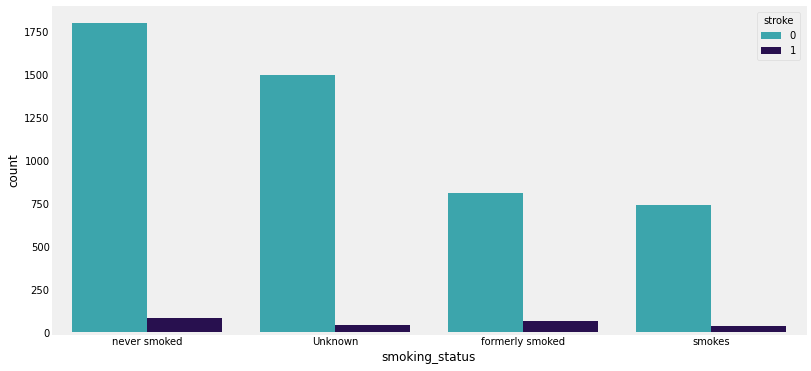

In [ ]:
plot_count(
    "smoking_status", palette=["#29B5BF"] + (len(smook_order)-1)*["#260659"],
    hue="stroke"
)

### Number of Unique Values

In [ ]:
# Karena sifatnya yang kategorik, kita akan melihat unique values di tiap masing-masing kolom
df_product[categorical_features].nunique()

status                   5
product_category        26
product_name          2802
product_brand          953
product_department       2
dtype: int64

In [ ]:
df_product[numerical_features].nunique()

id                                2998
cost                                66
order_id                          2972
product_id                         536
sale_price                          10
product_retail_price               129
product_distribution_center_id      10
dtype: int64

In [ ]:
for feature in categorical_features:
    print(df_product[feature].value_counts())
    print ('------')

Shipped       983
Complete      804
Processing    484
Cancelled     447
Returned      280
Name: status, dtype: int64
------
Intimates                        212
Shorts                           199
Tops & Tees                      192
Fashion Hoodies & Sweatshirts    190
Sleep & Lounge                   187
Jeans                            185
Sweaters                         183
Swim                             181
Accessories                      173
Outerwear & Coats                163
Active                           145
Underwear                        130
Pants                            123
Socks                            100
Dresses                           94
Maternity                         86
Suits & Sport Coats               85
Plus                              79
Socks & Hosiery                   62
Pants & Capris                    59
Blazers & Jackets                 52
Leggings                          44
Skirts                            35
Suits                    

In [ ]:
for feature in numerical_features:
    print(df_product[feature].value_counts())
    print ('------')

59347     1
142823    1
175688    1
124130    1
176590    1
         ..
171193    1
18798     1
176091    1
177014    1
15278     1
Name: id, Length: 2998, dtype: int64
------
66    244
11    130
12    106
6      98
9      98
     ... 
60      8
64      8
65      7
58      4
56      1
Name: cost, Length: 66, dtype: int64
------
88217     2
93668     2
56979     2
29362     2
42633     2
         ..
74040     1
122446    1
14662     1
78920     1
10538     1
Name: order_id, Length: 2972, dtype: int64
------
2465     13
28785    12
24939    12
10831    12
28790    12
         ..
8872      1
13631     1
15764     1
24995     1
9077      1
Name: product_id, Length: 536, dtype: int64
------
10.0    910
12.0    719
8.0     344
9.0     330
6.0     231
11.0    175
7.0     152
3.5      67
5.0      44
4.0      26
Name: sale_price, dtype: int64
------
136.5    245
25.0     151
39.0      86
49.0      83
29.0      75
        ... 
101.0      1
106.0      1
91.0       1
97.0       1
123.0      1
Name

### EDA on Categorical Features


In [ ]:
df_product[categorical_features]

,status,product_category,product_name,product_brand,product_department
0,Shipped,Underwear,Cocksox CXA93- Activewear Sporty Long Boxer - ...,Cocksox,Men
1,Shipped,Socks & Hosiery,Betsey Johnson Women's Betseys Banded Stirrup Otk,Betsey Johnson,Women
2,Complete,Outerwear & Coats,Columbia Men's Steens Mountain Full Zip,Columbia,Men
3,Cancelled,Swim,Quiksilver Men's Dry Dock Shorts,Quiksilver,Men
4,Cancelled,Sleep & Lounge,Big Feet Pjs Pink (703) Plush Footed Pajamas w...,Big Feet Pajama Co.,Women
...,...,...,...,...,...
2995,Processing,Jeans,Wrangler Men's Cowboy Cut Western 5 Pocket Jean,Wrangler,Men
2996,Processing,Fashion Hoodies & Sweatshirts,Paul Frank 94 Julius Hoodie Buddie Junior,Paul Frank,Women
2997,Processing,Sweaters,Jones New York Women's Plus-Size Shell,Jones New York,Women
2998,Processing,Intimates,Padded Briefs - Women's Sizes,Carol Wright Gifts,Women


In [ ]:
df_product[numerical_features]

,id,cost,order_id,product_id,sale_price,product_retail_price,product_distribution_center_id
0,59347,16,41038,13606,3.5,38.0,3
1,101072,7,69979,13606,3.5,20.0,4
2,63687,25,44006,13606,3.5,59.0,6
3,16338,31,11275,13606,3.5,54.0,9
4,85756,33,59418,13606,3.5,59.0,1
...,...,...,...,...,...,...,...
2995,13920,24,9589,12644,12.0,46.0,7
2996,46997,27,32519,18185,12.0,55.0,1
2997,14014,30,9649,25314,12.0,64.0,3
2998,14343,6,9887,11014,12.0,12.0,2


###  Correlation

In [ ]:
df_product.corr()['cost'].sort_values()

product_id                       -0.009831
product_distribution_center_id   -0.007540
sale_price                        0.001735
order_id                          0.015475
id                                0.015550
product_retail_price              0.981983
cost                              1.000000
Name: cost, dtype: float64

In [ ]:
df_product.corr()

,id,cost,order_id,product_id,sale_price,product_retail_price,product_distribution_center_id
id,1.000000,0.015550,0.999998,0.007070,-0.016948,0.013429,-0.015546
cost,0.015550,1.000000,0.015475,-0.009831,0.001735,0.981983,-0.007540
order_id,0.999998,0.015475,1.000000,0.007101,-0.016923,0.013333,-0.015549
product_id,0.007070,-0.009831,0.007101,1.000000,-0.034775,-0.004636,-0.006467
sale_price,-0.016948,0.001735,-0.016923,-0.034775,1.000000,0.005962,0.028882
product_retail_price,0.013429,0.981983,0.013333,-0.004636,0.005962,1.000000,-0.012391
product_distribution_center_id,-0.015546,-0.007540,-0.015549,-0.006467,0.028882,-0.012391,1.000000


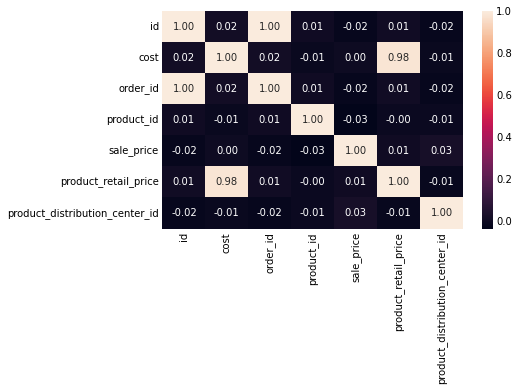

In [ ]:
sns.heatmap(df_product.corr(), annot=True, fmt=".2f")
plt.show()

###  Model Development



In [ ]:
df_product.head()

,id,cost,order_id,product_id,sale_price,product_retail_price,product_distribution_center_id,status,product_category,product_department,city,state,browser,traffic_source,event_type
0,97,14.0,73,9533,88.0,26.0,3,Terjual,Intimates,Women,Shenzhen,Jilin,Firefox,Adwords,department
1,98,14.0,73,15497,26.0,26.0,3,Terjual,Intimates,Women,Shenzhen,Jilin,Firefox,Adwords,product
2,99,6.0,73,15029,84.0,11.0,9,Terjual,Leggings,Women,Shenzhen,Jilin,Firefox,Adwords,cart
3,100,6.0,74,11195,28.0,11.0,9,Terjual,Leggings,Women,Shenzhen,Jilin,Firefox,Adwords,purchase
4,101,6.0,75,3970,34.0,11.0,9,Terjual,Leggings,Women,Harbin,Jiangsu,IE,Adwords,department


In [ ]:
# Define variable X (Independent variable/features)
X = df_product.drop(columns=['status']).copy()   # ---> Ingat ada drop berarti Independet variable tidak membutuhkan kolom HeartDisease

# Define variable y (Dependent variable/Target variable)
y = df_product['status'].copy()                  # ---> disini tidak ada drop berarti sebagai Dependent variable yang ditargetkan jadi hanya kolom HeartDisease

#### Data Splitting

In [ ]:
# buat masing-masing set
# pertama kita bagi dulu proporsi data train 90% dan data rest 10%
# kedua kita bagi data rest yang 10% tadi menjadi data dev 5% dan data test 5%

X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=.1, stratify=y, random_state=11)
X_dev, X_test, y_dev, y_test = train_test_split(X_rest, y_rest, test_size=.5, stratify=y_rest, random_state=11)

print(f"training size: {X_train.shape[0]} ({100*X_train.shape[0] / X.shape[0]:.3f}%)")
print(f"dev size: {X_dev.shape[0]} ({100*X_dev.shape[0] / X.shape[0]:.3f}%)")
print(f"test size: {X_test.shape[0]} ({100*X_test.shape[0] / X.shape[0]:.3f}%)")

training size: 2654 (89.997%)
dev size: 147 (4.985%)
test size: 148 (5.019%)


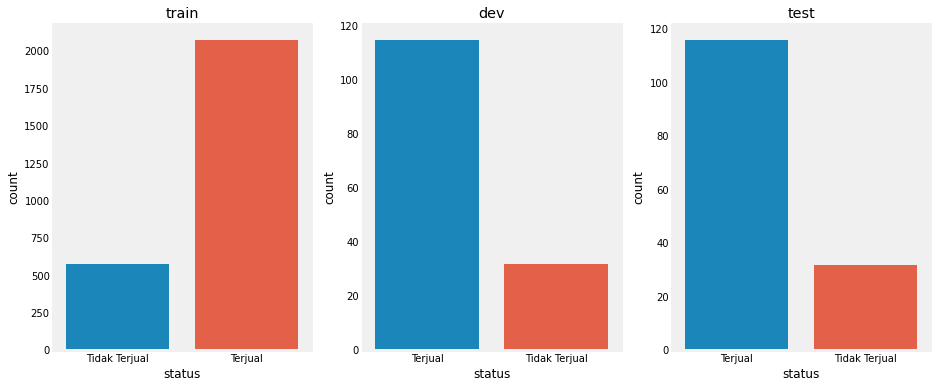

In [ ]:
# Visualisasi data train, data dev, dan data test menggunakan for loop
fig, axis = plt.subplots(1, 3, figsize=(14, 6))
for idx, label in enumerate([
    (y_train, "train"), (y_dev, "dev"), (y_test, "test")
]):
    sns.countplot(x=label[0], ax=axis[idx])
    axis[idx].set_title(label[1])
    axis[idx].grid(False)
plt.show()

In [ ]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2949 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              2949 non-null   int64 
 1   cost                            2949 non-null   int64 
 2   order_id                        2949 non-null   int64 
 3   product_id                      2949 non-null   int64 
 4   sale_price                      2949 non-null   int64 
 5   product_retail_price            2949 non-null   int64 
 6   product_distribution_center_id  2949 non-null   int64 
 7   status                          2949 non-null   object
 8   product_department              2949 non-null   object
 9   state                           2949 non-null   object
 10  browser                         2949 non-null   object
 11  traffic_source                  2949 non-null   object
 12  event_type                      2949 non-null   

#### Categorical Encoding

In [ ]:
# Buat variabel untuk beberapa kolom yang mengandung nominal, dan beberapa kolom yang mengandung ordinal
nominal_features = ['state','browser','traffic_source','event_type','product_category','city']          # ---> nominal untuk yang tidak berurut
ordinal_features = X.select_dtypes(         # ---> ordinal untuk yang berurut  
    include="object").drop(columns=nominal_features).columns.tolist()

print("nominal features:", nominal_features)
print("-----------------------------------")
print("ordinal features:")
pprint(ordinal_features, compact=True)

nominal features: ['state', 'browser', 'traffic_source', 'event_type', 'product_category', 'city']
-----------------------------------
ordinal features:
['product_department']


In [ ]:
# Fungsi OHE untuk Categorical Encoding
onehot = OneHotEncoder()
onehot.fit(X_train[nominal_features])
X_train_onehot = pd.DataFrame(
    onehot.transform(X_train[nominal_features]).toarray(),
    columns=onehot.get_feature_names_out()
)
X_dev_onehot = pd.DataFrame(
    onehot.transform(X_dev[nominal_features]).toarray(),
    columns=onehot.get_feature_names_out()
)
X_test_onehot = pd.DataFrame(
    onehot.transform(X_test[nominal_features]).toarray(),
    columns=onehot.get_feature_names_out()
)
print("one-hot matrix:")
display(X_train_onehot)

ordinal = OrdinalEncoder()
ordinal.fit(X_train[ordinal_features])
X_train_ordinal = pd.DataFrame(
    ordinal.transform(X_train[ordinal_features]),
    columns=ordinal.feature_names_in_
)
X_dev_ordinal = pd.DataFrame(
    ordinal.transform(X_dev[ordinal_features]),
    columns=ordinal.feature_names_in_
)
X_test_ordinal = pd.DataFrame(
    ordinal.transform(X_test[ordinal_features]),
    columns=ordinal.feature_names_in_
)
print("ordinal matrix:")
display(X_train_ordinal)

one-hot matrix:


,state_Anhui,state_Auvergne-Rhône-Alpes,state_Bahia,state_Bayern,state_Beijing,state_Bretagne,state_Brussels,state_California,state_Chongqing,state_Colorado,...,city_White,city_Xi'an,city_Xingtai,city_Yili Kazakh Autonomous Prefecture,city_Yinchuan,city_Yokohama City,city_Zebulon,city_Zhengzhou,city_Zhenjiang,city_Étalle
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


ordinal matrix:


,product_department
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
2649,0.0
2650,0.0
2651,1.0
2652,0.0


In [ ]:
# Sebelum scaling kita gabungkan dulu DataFrame menggunakan pandas function pd untuk masing2 data train, data dev, dan data test (data yang sudah di split, onehot, dan ordinal)
X_train_combined = pd.concat(
    [X_train[numerical_features].reset_index(drop=True), X_train_onehot, X_train_ordinal],
    axis=1
)
X_dev_combined = pd.concat(
    [X_dev[numerical_features].reset_index(drop=True), X_dev_onehot, X_dev_ordinal],
    axis=1
)
X_test_combined = pd.concat(
    [X_test[numerical_features].reset_index(drop=True), X_test_onehot, X_test_ordinal],
    axis=1
)

X_train_combined.head()

,id,cost,order_id,product_id,sale_price,product_retail_price,product_distribution_center_id,state_Anhui,state_Auvergne-Rhône-Alpes,state_Bahia,...,city_Xi'an,city_Xingtai,city_Yili Kazakh Autonomous Prefecture,city_Yinchuan,city_Yokohama City,city_Zebulon,city_Zhengzhou,city_Zhenjiang,city_Étalle,product_department
0,1748,15.0,1213,10013,41.0,36.0,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2978,27.0,2067,11069,15.0,53.0,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1462,16.0,1015,5631,78.0,39.0,5,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3057,4.0,2119,9341,12.0,9.0,4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,567,12.0,375,2815,15.0,25.0,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Standarisasi data
scaler = StandardScaler()
scaler.fit(X_train_combined)

X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_combined),
    columns=X_train_combined.columns
)
X_dev_scaled = pd.DataFrame(
    scaler.transform(X_dev_combined),
    columns=X_dev_combined.columns
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_combined),
    columns=X_test_combined.columns
)

with pd.option_context("display.max_columns", None):
    display(X_train_scaled.head())

,id,cost,order_id,product_id,sale_price,product_retail_price,product_distribution_center_id,state_Anhui,state_Auvergne-Rhône-Alpes,state_Bahia,state_Bayern,state_Beijing,state_Bretagne,state_Brussels,state_California,state_Chongqing,state_Colorado,state_Comunidad Valenciana,state_Comunidad de Madrid,state_Connecticut,state_Daejeon,state_England,state_Espírito Santo,state_Flanders,state_Florida,state_Fujian,state_Grand Est,state_Guangdong,state_Gyeonggi-do,state_Hauts-de-France,state_Hawaii,state_Hebei,state_Heilongjiang,state_Henan,state_Hiroshima,state_Hubei,state_Hunan,state_Illinois,state_Indiana,state_Jiangsu,state_Jiangxi,state_Jilin,state_Kanagawa,state_Liaoning,state_Louisiana,state_Lubuskie,state_Maranhão,state_Mato Grosso,state_Michigan,state_Minas Gerais,state_Mississippi,state_Nebraska,state_New Jersey,state_New York,state_Niedersachsen,state_Ningxia Hui Autonomous Region,state_Nordrhein-Westfalen,state_Normandie,state_North Carolina,state_Occitanie,state_Paraná,state_Pernambuco,state_Piauí,state_Principado de Asturias,state_Rio Grande do Sul,state_Rio de Janeiro,state_Sachsen,state_Sachsen-Anhalt,state_Santa Catarina,state_Seoul,state_Shandong,state_Shanghai,state_Shanxi,state_Shizuoka,state_Sichuan,state_South Carolina,state_São Paulo,state_Tennessee,state_Texas,state_Tianjin,state_Tochigi,state_Tokyo,state_Utah,state_Wallonia,state_Western Australia,state_Zhejiang,state_Île-de-France,browser_Chrome,browser_Firefox,browser_IE,browser_Other,browser_Safari,traffic_source_Adwords,traffic_source_Email,traffic_source_Facebook,traffic_source_Organic,traffic_source_YouTube,event_type_cart,event_type_department,event_type_home,event_type_product,event_type_purchase,product_category_Accessories,product_category_Active,product_category_Blazers & Jackets,product_category_Dresses,product_category_Fashion Hoodies & Sweatshirts,product_category_Intimates,product_category_Jeans,product_category_Jumpsuits & Rompers,product_category_Leggings,product_category_Maternity,product_category_Outerwear & Coats,product_category_Pants,product_category_Pants & Capris,product_category_Plus,product_category_Shorts,product_category_Skirts,product_category_Sleep & Lounge,product_category_Socks,product_category_Socks & Hosiery,product_category_Suits,product_category_Suits & Sport Coats,product_category_Sweaters,product_category_Swim,product_category_Tops & Tees,product_category_Underwear,city_Addlestone,city_Alfenas,city_Alta Floresta,city_Anaheim,city_Ann Arbor,city_Anshan,city_Asse,city_Augsburg,city_Bad Salzuflen,city_Beijing,city_Belleville-en-Beaujolais,city_Bellevue,city_Benxi,city_Bielefeld,city_Bijie,city_Bruz,city_Bussy-Saint-Georges,city_Caixas,city_Calais,city_Campo Novo do Parecis,city_Carazinho,city_Changde,city_Changsha,city_Chengdu,city_Chicago,city_Chongqing,city_Colorado Springs,city_Conceição do Coité,city_Croydon,city_Daejeon,city_Dallas,city_Deyang,city_Dois Vizinhos,city_Dongguan,city_Dortmund,city_Dunkerque,city_Einbeck,city_Essen,city_Evere,city_Frisco,city_Gainesville,city_Gelsenkirchen,city_Gijón,city_Gorzów Wielkopolski,city_Guiyang,city_Haltern am See,city_Handan,city_Hangzhou,city_Harbin,city_Hefei,city_Hegang,city_Hengyang,city_Hiroshima city,city_Hohhot,city_Honolulu,city_Horn Lake,city_Houston,city_Huainan,city_Hurricane,city_Huzhou,city_Hwaseong City,city_Ipiranga do Norte,city_Jiangmen,city_Jiaxing,city_Jilin,city_Jinan,city_Kaifeng,city_Kashgar area,city_La Neuville-en-Hez,city_Lagoa Santa,city_Lake Muir,city_Langfang,city_Laredo,city_Leigh,city_Lilienthal,city_Limeil-Brévannes,city_Los Banos,city_Madrid,city_Majadahonda,city_Meißen,city_Meschede,city_Mililani,city_Mishima City,city_Mission Bend,city_Mouscron,city_Murrells Inlet,city_Mönchengladbach,city_Naumburg (Saale),city_Navegantes,city_New Orleans,city_Nova Venécia,city_Nova Viçosa,city_Oliva,city_Omaha,city_Paris,city_Perth,city_Piripiri,city_Portage,city_Qingdao,city_Recife,city_Rio de Janeiro,city_River Vale,city_Riviera Beach,city_Rochecolombe,city_Roma

In [ ]:
# Panggil function DecisionTreeClassifier() dari scikit-learn
model_default = DecisionTreeClassifier(random_state=11)

# Terapkan model tersebut menggunakan funciton fit() untuk membuat model berdasarkan set training
model_default.fit(X_train_scaled, y_train)

# Dengan menggunakan model yang sudah dibuat, hitung prediksi dengan menggunakan function predict() di tiap set
preds_train = model_default.predict(X_train_scaled)
preds_dev = model_default.predict(X_dev_scaled)
preds_test = model_default.predict(X_test_scaled)

In [ ]:
# development set
print("dev prediction samples:\n", preds_dev[:10])
print("dev target samples:\n", y_dev[:10].tolist())

dev prediction samples:
 ['Terjual' 'Terjual' 'Terjual' 'Terjual' 'Terjual' 'Tidak Terjual'
 'Terjual' 'Terjual' 'Terjual' 'Terjual']
dev target samples:
 ['Terjual', 'Terjual', 'Terjual', 'Terjual', 'Terjual', 'Terjual', 'Terjual', 'Terjual', 'Terjual', 'Terjual']


In [ ]:
# testing set
print("test prediction samples:\n", preds_test[:10])
print("test target samples:\n", y_test[:10].tolist())

test prediction samples:
 ['Terjual' 'Terjual' 'Terjual' 'Terjual' 'Tidak Terjual' 'Terjual'
 'Terjual' 'Terjual' 'Tidak Terjual' 'Terjual']
test target samples:
 ['Terjual', 'Terjual', 'Terjual', 'Terjual', 'Tidak Terjual', 'Tidak Terjual', 'Terjual', 'Terjual', 'Terjual', 'Terjual']


In [ ]:
# Panggil function DecisionTreeClassifier() dari scikit-learn dan atur parameter
simpler_model = DecisionTreeClassifier(
    max_depth=7, min_samples_split=int(1e3),
    random_state=11
)
simpler_model.fit(X_train_scaled, y_train)

preds_train_simpler = simpler_model.predict(X_train_scaled)
preds_dev_simpler = simpler_model.predict(X_dev_scaled)
preds_test_simpler = simpler_model.predict(X_test_scaled)

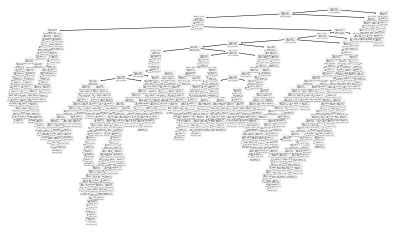

In [ ]:
# long running code with full depth
plot_tree(model_default)
plt.show()

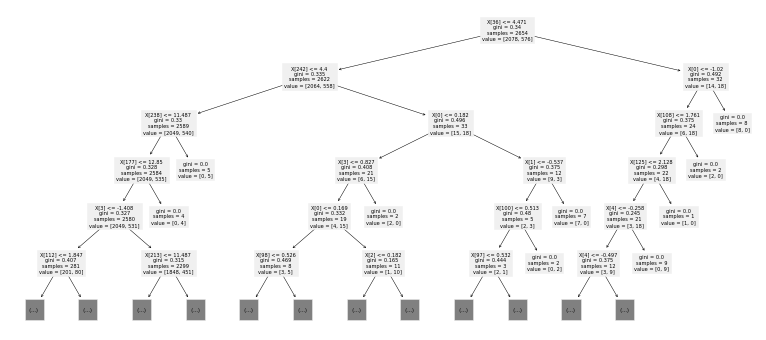

In [ ]:
plt.figure(figsize=(12, 6))
plot_tree(model_default, max_depth=5)
plt.show()

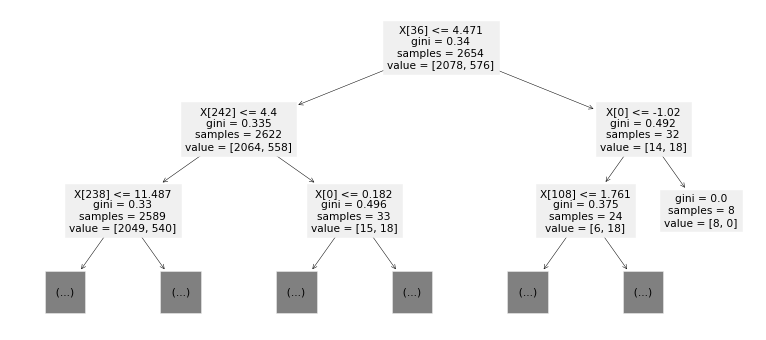

In [ ]:
plt.figure(figsize=(12, 6))
plot_tree(model_default, max_depth=2)
plt.show()

               precision    recall  f1-score   support

      Terjual       1.00      1.00      1.00      2078
Tidak Terjual       1.00      1.00      1.00       576

     accuracy                           1.00      2654
    macro avg       1.00      1.00      1.00      2654
 weighted avg       1.00      1.00      1.00      2654



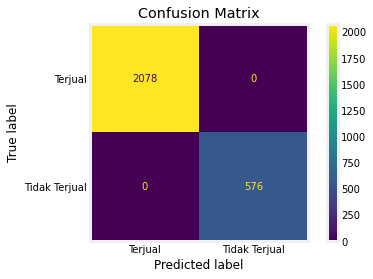

In [ ]:
print(classification_report(y_train, preds_train))

ConfusionMatrixDisplay.from_predictions(y_train, preds_train)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

               precision    recall  f1-score   support

      Terjual       0.80      0.85      0.83       115
Tidak Terjual       0.32      0.25      0.28        32

     accuracy                           0.72       147
    macro avg       0.56      0.55      0.55       147
 weighted avg       0.70      0.72      0.71       147



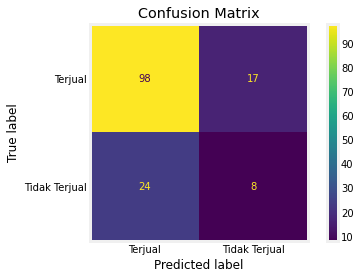

In [ ]:
print(classification_report(y_dev, preds_dev))

ConfusionMatrixDisplay.from_predictions(y_dev, preds_dev)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

               precision    recall  f1-score   support

      Terjual       0.82      0.83      0.82       116
Tidak Terjual       0.35      0.34      0.35        32

     accuracy                           0.72       148
    macro avg       0.59      0.59      0.59       148
 weighted avg       0.72      0.72      0.72       148



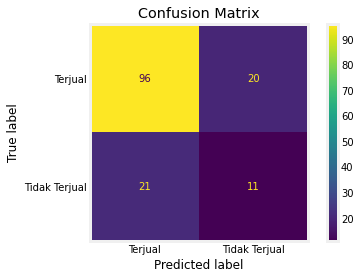

In [ ]:
print(classification_report(y_test, preds_test))

ConfusionMatrixDisplay.from_predictions(y_test, preds_test)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

> Ada 4 kemungkinan:
* **True Positive (TP)**: sampel yang sebenarnya True/1 berhasil diprediksi oleh model sebagai True/Positive
* **True Negative (TN)**: sample yang sebenarnya False/0 berhasil diprediksi oleh model sebagai False/0
* **False Positive (FP)**: sampel yang sebenarnya False/0, tapi diprediksi oleh model sebagai True/1
* **False Negative (FN)**: sampel yang sebenarnya True/1, tapi diprediksi oleh model sebagai False/0

#### Exporting results

In [ ]:
X.head()

,id,cost,order_id,product_id,sale_price,product_retail_price,product_distribution_center_id,product_category,product_department,city,state,browser,traffic_source,event_type
0,97,14.0,73,9533,88.0,26.0,3,Intimates,Women,Shenzhen,Jilin,Firefox,Adwords,department
1,98,14.0,73,15497,26.0,26.0,3,Intimates,Women,Shenzhen,Jilin,Firefox,Adwords,product
2,99,6.0,73,15029,84.0,11.0,9,Leggings,Women,Shenzhen,Jilin,Firefox,Adwords,cart
3,100,6.0,74,11195,28.0,11.0,9,Leggings,Women,Shenzhen,Jilin,Firefox,Adwords,purchase
4,101,6.0,75,3970,34.0,11.0,9,Leggings,Women,Harbin,Jiangsu,IE,Adwords,department


In [ ]:
# Melihat feature atau kolom pada data ordinal
ordinal.feature_names_in_.tolist()

['product_department']

In [ ]:
# Melihat feature atau kolom gabungan (numerical, nominal, ordinal)
numerical_features + onehot.get_feature_names_out().tolist() + ordinal.feature_names_in_.tolist()

['id',
 'cost',
 'order_id',
 'product_id',
 'sale_price',
 'product_retail_price',
 'product_distribution_center_id',
 'state_Anhui',
 'state_Auvergne-Rhône-Alpes',
 'state_Bahia',
 'state_Bayern',
 'state_Beijing',
 'state_Bretagne',
 'state_Brussels',
 'state_California',
 'state_Chongqing',
 'state_Colorado',
 'state_Comunidad Valenciana',
 'state_Comunidad de Madrid',
 'state_Connecticut',
 'state_Daejeon',
 'state_England',
 'state_Espírito Santo',
 'state_Flanders',
 'state_Florida',
 'state_Fujian',
 'state_Grand Est',
 'state_Guangdong',
 'state_Gyeonggi-do',
 'state_Hauts-de-France',
 'state_Hawaii',
 'state_Hebei',
 'state_Heilongjiang',
 'state_Henan',
 'state_Hiroshima',
 'state_Hubei',
 'state_Hunan',
 'state_Illinois',
 'state_Indiana',
 'state_Jiangsu',
 'state_Jiangxi',
 'state_Jilin',
 'state_Kanagawa',
 'state_Liaoning',
 'state_Louisiana',
 'state_Lubuskie',
 'state_Maranhão',
 'state_Mato Grosso',
 'state_Michigan',
 'state_Minas Gerais',
 'state_Mississippi',
 'st

In [ ]:
# feature atau kolom gabungan diatas dimasukan dalam variabel column_names
column_names = (
    numerical_features
    + onehot.get_feature_names_out().tolist()
    + ordinal.feature_names_in_.tolist()
)

# Membuat variabel X_processed gabungan antara kolom numerical, nominal, ordinal data
X_processed = pd.concat(
    [
     # numerical features
     X[numerical_features].reset_index(drop=True),
     # one-hot encoded features
     pd.DataFrame(
         onehot.transform(X[nominal_features]).toarray(),
         columns=onehot.get_feature_names_out().tolist()
     ),
     # ordinal encoded features
     pd.DataFrame(
         ordinal.transform(X[ordinal_features]),
         columns=ordinal.feature_names_in_.tolist()
     ),
    ],
    axis=1
)

# Membuat scaling pada variabel X_processed diatas dimasukan ke variabel X_processed_scaled
X_processed_scaled = pd.DataFrame(
    scaler.transform(X_processed),
    columns=X_processed.columns
)

# Membuat prediksi keseluruhan kemudian dimasukan pada variabel preds_full
print("Predicting all {} data..".format(X_processed_scaled.shape[0]))
preds_full = model_default.predict(X_processed_scaled)

# Menggabungkan data prediction ke data original
print("Combine the prediction back to the original data..")
X = X.assign(prediction=preds_full)

# Memperlihatkan data keseluruhan
print("Overview of the resulting data..")
with pd.option_context("display.max_columns", None):
    display(X.head())


# Melakukan export ke CSV
print("Export to CSV..")
X.to_csv("prediction.csv", index=False)

print("Done!")

Predicting all 2949 data..
Combine the prediction back to the original data..
Overview of the resulting data..


,id,cost,order_id,product_id,sale_price,product_retail_price,product_distribution_center_id,product_category,product_department,city,state,browser,traffic_source,event_type,prediction
0,97,14.0,73,9533,88.0,26.0,3,Intimates,Women,Shenzhen,Jilin,Firefox,Adwords,department,Terjual
1,98,14.0,73,15497,26.0,26.0,3,Intimates,Women,Shenzhen,Jilin,Firefox,Adwords,product,Terjual
2,99,6.0,73,15029,84.0,11.0,9,Leggings,Women,Shenzhen,Jilin,Firefox,Adwords,cart,Terjual
3,100,6.0,74,11195,28.0,11.0,9,Leggings,Women,Shenzhen,Jilin,Firefox,Adwords,purchase,Terjual
4,101,6.0,75,3970,34.0,11.0,9,Leggings,Women,Harbin,Jiangsu,IE,Adwords,department,Terjual


Export to CSV..
Done!


##Simple Linear Regression

In [ ]:
df_product.shape

(2998, 12)

In [ ]:
df_product['cost'] = df_product['cost'].apply(int)
df_product['product_retail_price'] = df_product['product_retail_price'].apply(int)
df_product['sale_price'] = df_product['sale_price'].apply(int)
df_product['product_distribution_center_id'] = df_product['product_distribution_center_id'].apply(int)

In [ ]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2998 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              2998 non-null   int64 
 1   cost                            2998 non-null   int64 
 2   order_id                        2998 non-null   int64 
 3   product_id                      2998 non-null   int64 
 4   sale_price                      2998 non-null   int64 
 5   product_retail_price            2998 non-null   int64 
 6   product_distribution_center_id  2998 non-null   int64 
 7   status                          2998 non-null   object
 8   product_category                2998 non-null   object
 9   product_name                    2998 non-null   object
 10  product_brand                   2998 non-null   object
 11  product_department              2998 non-null   object
dtypes: int64(7), object(5)
memory usage: 304.5+ KB


In [ ]:
df_product.describe()

,id,cost,order_id,product_id,sale_price,product_retail_price,product_distribution_center_id
count,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000
mean,89313.139760,24.516011,61755.635090,15415.588392,9.456304,51.158439,4.930287
std,52854.494822,18.377286,36505.447345,7424.274468,2.180829,38.134912,2.882902
min,74.000000,1.000000,51.000000,171.000000,3.000000,2.000000,1.000000
25%,41781.500000,11.000000,28934.750000,10725.000000,8.000000,24.000000,2.000000
50%,89085.500000,19.000000,61737.000000,12567.000000,10.000000,39.000000,4.000000
75%,135176.500000,33.000000,93500.750000,24734.500000,11.000000,69.000000,7.000000
max,180406.000000,66.000000,124440.000000,29020.000000,12.000000,136.000000,10.000000


In [ ]:
df_product.isnull().sum()*100/df_product.shape[0]

id                                0.0
cost                              0.0
order_id                          0.0
product_id                        0.0
sale_price                        0.0
product_retail_price              0.0
product_distribution_center_id    0.0
status                            0.0
product_category                  0.0
product_name                      0.0
product_brand                     0.0
product_department                0.0
dtype: float64

In [ ]:
#df_product = df_product.dropna() -> Jika data ada missing value

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


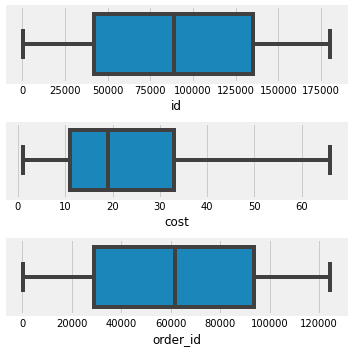

In [ ]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df_product['id'], ax = axs[0])
plt2 = sns.boxplot(df_product['cost'], ax = axs[1])
plt3 = sns.boxplot(df_product['order_id'], ax = axs[2])
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


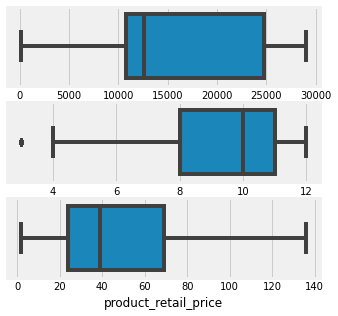

In [ ]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df_product['product_id'], ax = axs[0])
plt2 = sns.boxplot(df_product['sale_price'], ax = axs[1])
plt3 = sns.boxplot(df_product['product_retail_price'], ax = axs[2])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


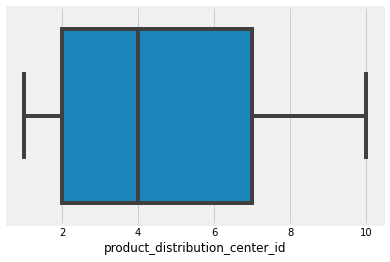

In [ ]:
sns.boxplot(df_product['product_distribution_center_id'])
plt.show()

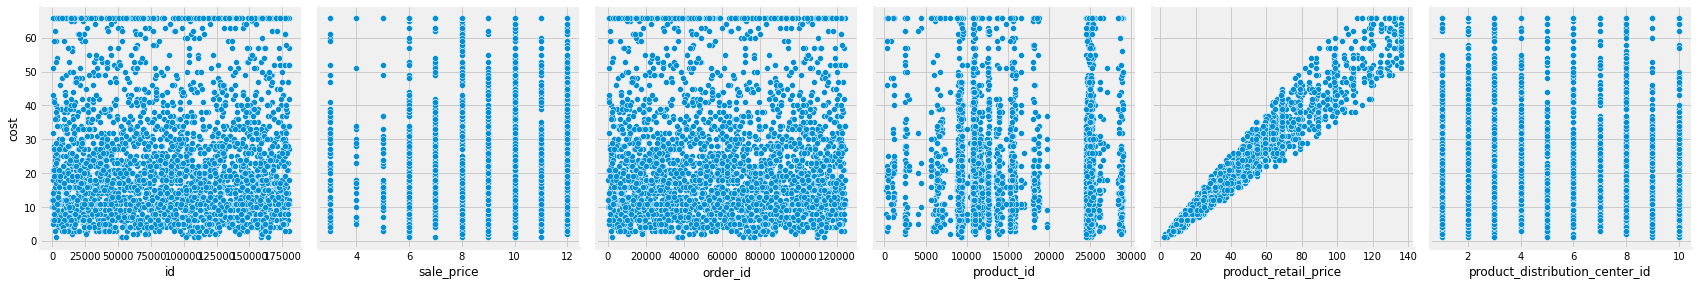

In [ ]:
sns.pairplot(df_product, x_vars=['id', 'sale_price', 'order_id','product_id','product_retail_price','product_distribution_center_id'], y_vars='cost', height=4, aspect=1, kind='scatter')
plt.show()

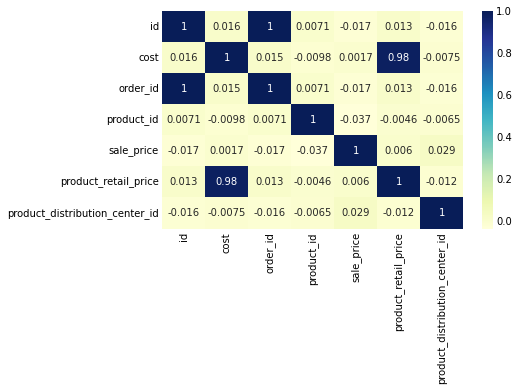

In [ ]:
sns.heatmap(df_product.corr(), cmap="YlGnBu", annot = True)
plt.show()

#### Cost & Sale Price

In [ ]:
X = df_product['cost'] #Variabel Independen
y = df_product['sale_price'] #Variabel Dependen

Text(0, 0.5, 'Sale Price')

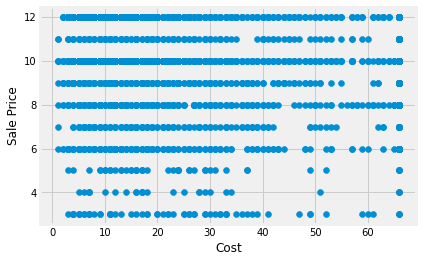

In [ ]:
plt.scatter(X,y)
plt.xlabel('Cost')
plt.ylabel('Sale Price')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,
                                       test_size = 0.3, random_state = 100)

In [ ]:
print(f"X Train size: {X_train.shape[0]}")
print(f"X Test size: {X_test.shape[0]}")
print(f"Y Train size: {y_train.shape[0]}")
print(f"Y Test size: {y_test.shape[0]}")

X Train size: 2098
X Test size: 900
Y Train size: 2098
Y Test size: 900


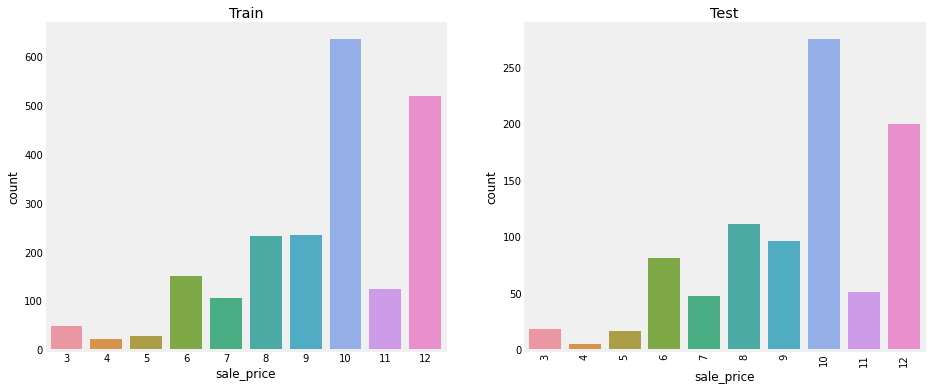

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(14, 6))
plt.xticks(rotation=90)
for idx, label in enumerate([
    (y_train, "Train"), (y_test, "Test")
]):
    sns.countplot(x=label[0], ax=axis[idx])
    axis[idx].set_title(label[1])
    axis[idx].grid(False)
plt.show()

In [ ]:
import statsmodels.api as sm
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
lr.params

const    9.426741
cost     0.002701
dtype: float64

In [ ]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.110
Date:                Wed, 22 Jun 2022   Prob (F-statistic):              0.292
Time:                        08:23:36   Log-Likelihood:                -4617.7
No. Observations:                2098   AIC:                             9239.
Df Residuals:                    2096   BIC:                             9251.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4267      0.080    118.469      0.0

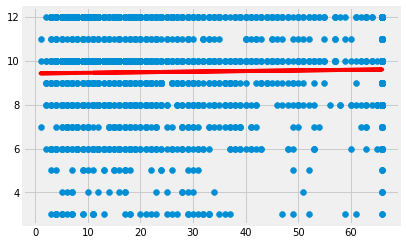

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 9.42 + 0.0027*X_train, 'r')
plt.show()

#####Model Evaluation

In [ ]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


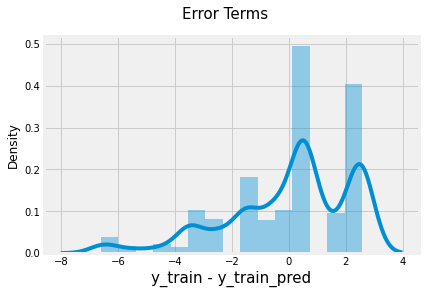

In [ ]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

Residu tidak mengikuti distribusi normal dan memiliki rata rata antara 0-3.

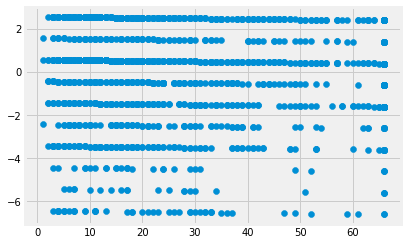

In [ ]:
plt.scatter(X_train,res)
plt.show()

In [ ]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
y_pred.head()

1273    9.510461
700     9.440244
357     9.453747
2778    9.442944
562     9.507760
dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_real = mean_squared_error(y_test, y_pred)
mae_real = mean_absolute_error(y_test, y_pred)
#Returns the mean squared error; we'll take a square root
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)


print(f"Mean Squared Error (MSE)  : {mse_real:.4f}")
print(f"Mean Absolute Error (MAE)  : {mae_real:.4f}")
print(f"Root Mean Squared Error (RMSE)  : ",RMSE)
print(f"R Squared  : ",r_squared)

Mean Squared Error (MSE)  : 4.7099
Mean Absolute Error (MAE)  : 1.7206
Root Mean Squared Error (RMSE)  :  2.1702391447634444
R Squared  :  -0.006031823371459799


In [ ]:
r_squared = r2_score(y_test, y_pred)
r_squared

-0.006031823371459799

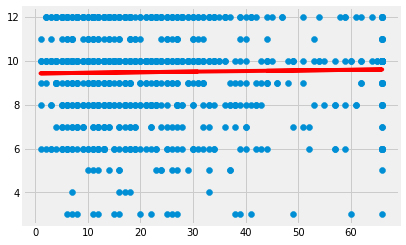

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test,  9.42 + 0.0027 * X_test, 'r')
plt.show()

#### Cost & Retail Price

In [ ]:
X = df_product['cost'] #Variabel Independen
y = df_product['product_retail_price'] #Variabel Dependen

Text(0, 0.5, 'Retail Price')

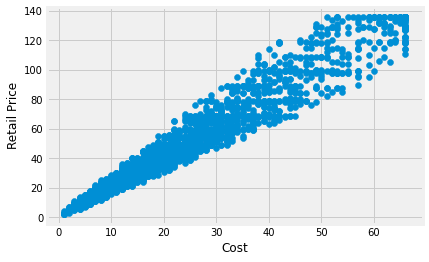

In [ ]:
plt.scatter(X,y)
plt.xlabel('Cost')
plt.ylabel('Retail Price')

Sekarang perlu membagi variabel kami menjadi set Train dan Test. Hal ini akan dilakukan dengan mengimpor train_test_split dari perpustakaan sklearn.model_selection. Biasanya merupakan praktik yang baik untuk menyimpan 90% data dalam kumpulan data Train dan 10% sisanya dalam kumpulan data Test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
  train_size = 0.9, test_size = 0.1, random_state = 100)

In [ ]:
print(f"X Train size: {X_train.shape[0]}")
print(f"X Test size: {X_test.shape[0]}")
print(f"Y Train size: {y_train.shape[0]}")
print(f"Y Test size: {y_test.shape[0]}")

X Train size: 2698
X Test size: 300
Y Train size: 2698
Y Test size: 300


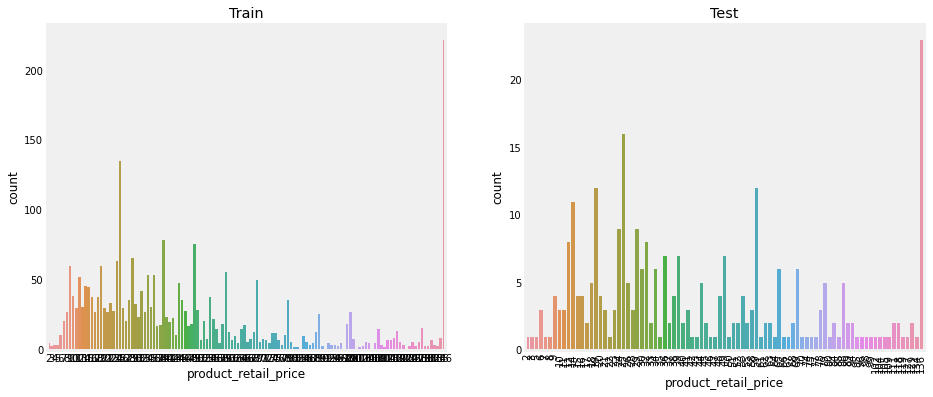

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(14, 6))
plt.xticks(rotation=90)
for idx, label in enumerate([
    (y_train, "Train"), (y_test, "Test")
]):
    sns.countplot(x=label[0], ax=axis[idx])
    axis[idx].set_title(label[1])
    axis[idx].grid(False)
plt.show()


In [ ]:
X_train.head()

983     17
2022    19
942      8
2765    28
823     29
Name: cost, dtype: int64

In [ ]:
y_train.head()

983     29
2022    44
942     14
2765    58
823     56
Name: product_retail_price, dtype: int64

In [ ]:
import statsmodels.api as sm
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
lr.params

const    1.128100
cost     2.040141
dtype: float64

In [ ]:
print(lr.summary())

                             OLS Regression Results                             
Dep. Variable:     product_retail_price   R-squared:                       0.965
Model:                              OLS   Adj. R-squared:                  0.965
Method:                   Least Squares   F-statistic:                 7.418e+04
Date:                  Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                          07:33:25   Log-Likelihood:                -9142.9
No. Observations:                  2698   AIC:                         1.829e+04
Df Residuals:                      2696   BIC:                         1.830e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1281      0.230

1. The coefficient for Cost is 1.12, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance.
2. R - squared is 0.965
Meaning that 96.5% of the variance in Sales is explained by product_retail_price

> Indented block


This is a decent R-squared value.
3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

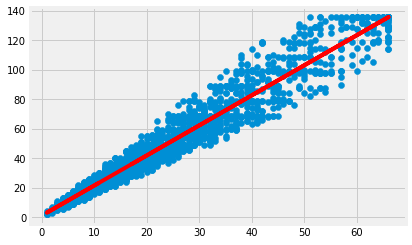

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 1.12 + 2.04*X_train, 'r')
plt.show()

##### Model Evaluation

In [ ]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


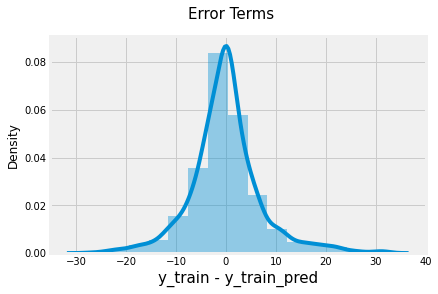

In [ ]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

Residu mengikuti distribusi normal dengan rata-rata 0. Semua bagus!

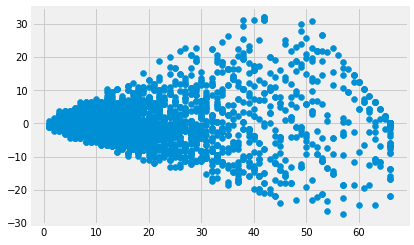

In [ ]:
plt.scatter(X_train,res)
plt.show()

In [ ]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
y_pred.head()

1273    64.372484
700     11.328807
357     21.529514
2778    13.368948
562     62.332342
dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_real = mean_squared_error(y_test, y_pred)
mae_real = mean_absolute_error(y_test, y_pred)
#Returns the mean squared error; we'll take a square root
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Squared Error (MSE) - Test data : {mse_real:.4f}")
print(f"Mean Absolute Error (MAE) - Test data : {mae_real:.4f}")
print(f"Root Mean Squared Error (RMSE) - Test data : ",RMSE)

Mean Squared Error (MSE) - Test data : 57.3647
Mean Absolute Error (MAE) - Test data : 5.0912
Root Mean Squared Error (RMSE) - Test data :  7.5739513566608965


RMSE cara standar dan populer untuk mengukur kesalahan suatu model dalam memprediksi data kuantitatif yang menunjukkan seberapa tersebar data di sekitar garis yang paling cocok. RMSE juga merupakan kriteria penting dalam memilih model berperforma terbaik di antara model peramalan berbeda. Jadi eror yang telah dilakukan pada data diatas didapatkan 7.57, hal ini dinilai kurang sehingga tidak disarankan untuk menerapkan model yang karena penjualan retail sale yang bergerak dinamis dan tidak bisa diprediksi pada masa yang akan datang.

In [ ]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.957331544962985

R squared merupakan angka yang berkisar antara 0 sampai 1 yang mengindikasikan besarnya kombinasi variabel independen secara bersama – sama mempengaruhi nilai variabel dependen. Nilai R-squared (R2) digunakan untuk menilai seberapa besar pengaruh variabel independen tertentu terhadap variabel dependen.nilai R-Square dikategorikan kuat jika lebih dari 0,67, moderat jika lebih dari 0,33 tetapi lebih rendah dari 0,67, dan lemah jika lebih dari 0,19 tetapi lebih rendah dari 0,33. Dan disini didapatkan nilai 0.95 yang dimana nilai dari dari cost sangat berpengaruh untuk retail sale dalam menentukan harga.

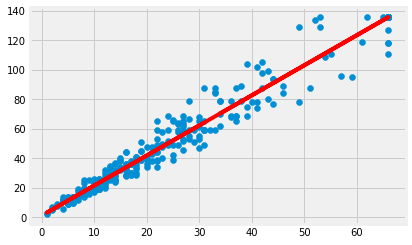

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 1.12 + 2.04 * X_test, 'r')
plt.show()